In [532]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [42]:
#egg_revenue funtion will be a function that returns the revenue from selling x dozen eggs at x price, laid by x chickens  

def egg_revenue(chickens, days, sale_price, cost_of_carton): 
    
    #chickens - number of chickens in the flock
    #days - number of days you want to simulate (i.e. 31 for month, 365 for year, etc.)
    #sale_price - the price at which you can sell 1 dozen eggs (will vary by location)
    #cost_of_carton - cost of indiviudal egg carton
    
    total_egg_count = []
    #total_egg_count will hold the count of eggs laid each day
    #We will take this count, sum it, and then multiply by the
    #price of the eggs to get revenue

    for day in range(days): #for loop to loop through each of the days chosen in the input parameter
        
        egg = [0,1]  # egg is setting our outcomes, 0 for no egg, 1 for an egg
        eggs_today = [] # will hold the count of the eggs laid by each chicken in a day

        daily_egg_prob = np.random.uniform(low = 235, high = 275, size = chickens)
        #daily_egg_prob uses a uniform distribution to randomly select values between 235 and 275, which is 
        #is the interval for how many eggs a chicken lays per year. The size parameter above will be set
        #to select a random sample for every chicken in the flock. 

        for i in daily_egg_prob: #here we loop through the above samples for each chicken and use the sample to calculate
            #a probability that a chicken will lay an egg that day (i.e. p = 275/365)
            
            probabilities = [1-(i/365),(i/365)] #[0] is the outcome where an egg is NOT laid, [1] is an egg is laid
            
            outcome = np.random.choice(egg, size = 1, p= probabilities) #based on the probabilities, picks an outcome
            #of an egg or no egg for a day
            
            eggs_today.append(outcome[0]) #adds the outcome for that chicken to the list. 
            
        total_egg_count.append(sum(eggs_today)) #adds the sum of the eggs for a day from each chicken in the flock 

    total_eggs = sum(total_egg_count) #sums all eggs for all days selected in the input parameter
    
    dozen_eggs = total_eggs / 12 #divide by 12 to get how many dozen eggs we can sell
    
    return math.floor(dozen_eggs) * (sale_price - cost_of_carton) #retuns only eggs that fit into a 
    #dozen * sale price of dozen eggs less the cost of the carton
    
    
egg_revenue(10,365, 4.25, 0.23)

860.2799999999999

In [29]:
#food_consumption function will calculate how much cost is incurred by feeding x amount of birds based on the cost
#of the feed and how many lbs were purchased

def food_consumption(chickens, days, bag_of_feed_cost, lbs_of_feed):
    
    #chickens - number of chickens in the flock
    #days - number of days you want to simulate (i.e. 31 for month, 365 for year, etc.)
    #bag_of_feed_cost - price of a single bag of feed
    #lbs_of_feed - lbs of feed that were purchased from a single bag
    
    food_consumption = np.random.uniform(low = .23, high = .27, size = days*chickens) # A laying hen will consume between 
    #.23 and .27 lbs of feed per day. This function pulls a sample between .23 and .27 for each chicken for every day 
    #of the simulation allowing us to calculate how many pounds of feed x amount of chickens ate over the selected
    #time period    
    
    bags_of_feed = math.ceil(sum(food_consumption)/lbs_of_feed) #food consumed divided by the lbs of feed you purchase to 
    #calculate how many bags of feed were purchased
    
    return round(bags_of_feed * bag_of_feed_cost,2) #returns the cost as bags of feed consumed * cost of the bags

food_consumption(10,365,23.99,35)

647.73

In [350]:
#bedding_cost function will calculate the cost incurred from having to change the nesting bedding. The function
#assumes the bedding needs to be changed every 27-31 days and the number of chickens you have affects how much bedding
#you need

def bedding_cost(chickens, days, bag_of_bedding_cost, cubic_feet_of_bedding):
    
    #chickens - number of chickens in the flock
    #days - number of days you want to simulate (i.e. 31 for month, 365 for year, etc.)
    #bag_of_bedding_cost - price of a single bag of bedding
    #cubic_feet_of_bedding - cubic feed of bedding that were purchased from a single bag of bedding
    
    days_to_refresh = math.ceil(np.random.uniform(low = 27, high = 31, size = 1)) #randomly chooses a number between 27 
    # and 31 days which is how often the bedding needs to be refreshed
    
    times_to_refresh_bedding = math.ceil(days/days_to_refresh) #calculates how many times the bedding needed to be 
    #refreshed during the time period entered into for the simulation
        
    chickens_for_10_cubic_feet = math.ceil(np.random.uniform(low = 23, high = 26, size = 1)) # selects a random number
    #between 23 and 26, which is the number of chickens that can be provided nesting with 10 cubic feet of bedding
   
    if chickens <= chickens_for_10_cubic_feet: #if we less than or equal to the number of chickens randomly selected
    #from above, we won't need to buy an additional bag 
    
        feet_from_chickens = 0 #no additional bag needed
        
    else:
        feet_from_chickens = math.ceil(((10/chickens_for_10_cubic_feet) * chickens)/cubic_feet_of_bedding)
        #divide 10 by the number of chickens that 10 cubic feet will provide for to get a rate per bird
        #then multiply that rate by how many chickens are in our simulation
        #finally, divide that amount by how many cubic feet of bedding are in a single bag, to determine how 
        #many bags we need.
   
    return round(bag_of_bedding_cost * (times_to_refresh_bedding + feet_from_chickens),2) #returns cost of bedding
    
bedding_cost(25, 365, 8.79,10)

114.27

In [527]:
gross_profit_amounts = []
revenue_amounts = []
food_cost_amounts = []
bed_cost_amounts = []
total_cost_amounts = []

for i in range(0,100):

    chickens = 25
    days = 365
    sale_price = 3.50
    cost_of_carton = 0.23
    bag_of_feed_cost = 23.99
    lbs_of_feed = 35
    bag_of_bedding_cost = 8.49
    cubic_feet_of_bedding = 10
    additional_cost = 0

    revenue = egg_revenue(chickens, days, sale_price, cost_of_carton)
    food_cost = food_consumption(chickens, days, bag_of_feed_cost, lbs_of_feed)
    bed_cost = bedding_cost(chickens, days, bag_of_bedding_cost, cubic_feet_of_bedding)
    total_cost = food_cost + bed_cost + additional_cost

    gross_profit = revenue - food_cost - bed_cost - additional_cost
    gross_profit_amounts.append(gross_profit)
    revenue_amounts.append(revenue)
    food_cost_amounts.append(food_cost)
    bed_cost_amounts.append(bed_cost)
    total_cost_amounts.append(total_cost)


In [581]:
chickens_to_sweep = np.linspace(1,50,50)   
avg_gross_profit_amounts = []
avg_revenue_amounts = []
avg_food_cost_amounts = []
avg_bed_cost_amounts = []
avg_total_cost_amounts = []

for n_chickens in chickens_to_sweep:
    gross_profit_amounts = []
    revenue_amounts = []
    food_cost_amounts = []
    bed_cost_amounts = []
    total_cost_amounts = []

    for i in range(0,100):

        chickens = int(n_chickens)
        days = 365
        sale_price = 3.50
        cost_of_carton = 0.23
        bag_of_feed_cost = 23.99
        lbs_of_feed = 35
        bag_of_bedding_cost = 8.49
        cubic_feet_of_bedding = 10
        additional_cost = 0

        revenue = egg_revenue(chickens, days, sale_price, cost_of_carton)
        food_cost = food_consumption(chickens, days, bag_of_feed_cost, lbs_of_feed)
        bed_cost = bedding_cost(chickens, days, bag_of_bedding_cost, cubic_feet_of_bedding)
        total_cost = food_cost + bed_cost + additional_cost

        gross_profit = revenue - food_cost - bed_cost - additional_cost
        gross_profit_amounts.append(gross_profit)
        revenue_amounts.append(revenue)
        food_cost_amounts.append(food_cost)
        bed_cost_amounts.append(bed_cost)
        total_cost_amounts.append(total_cost)
    
    avg_gross_profit_amounts.append(np.average(gross_profit_amounts))
    avg_revenue_amounts.append(np.average(revenue_amounts))
    avg_food_cost_amounts.append(np.average(food_cost_amounts))
    avg_bed_cost_amounts.append(np.average(bed_cost_amounts))
    avg_total_cost_amounts.append(np.average(total_cost_amounts))

In [578]:
avg_gross_profit_amounts.index(max(avg_gross_profit_amounts))
np.linspace(5,50,10)[9]

50.0

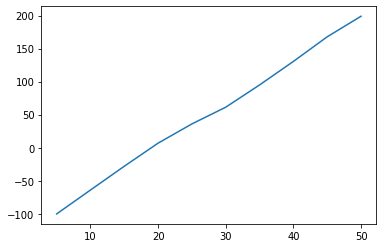

In [579]:
plt.plot(np.linspace(5,50,10), avg_gross_profit_amounts)

In [580]:
avg_gross_profit_amounts

[-100.31840000000003,
 -64.12860000000002,
 -28.103300000000026,
 6.870499999999969,
 36.00510000000008,
 61.287699999999994,
 95.01590000000016,
 130.5915000000002,
 167.88399999999984,
 199.00279999999998]

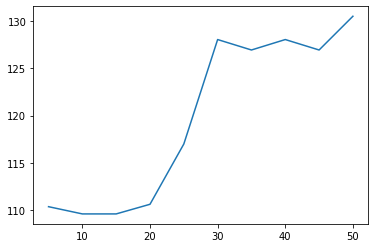

In [569]:
plt.plot(np.linspace(5,50,10), avg_bed_cost_amounts)

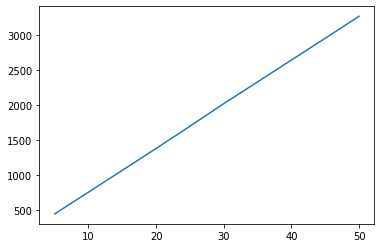

In [570]:
plt.plot(np.linspace(5,50,10), avg_total_cost_amounts)